# Kinematics of Qronk

Qronk will have 12 degrees of freedom - 3 servo motors in each leg.

To move the robot we will need to use inverse kinematics, which will allow us to determine the angle of the servo motors based on our desired locations. This will have to be done for two components to allow freedom in control. 

1. Chassis: find the displacement and rotation of the chassis first, to adjust centre of gravity.
2. Feet: find the displacement of the feet, to move the robot forward.  

For development, we will begin by focusing on creating the inverse kinematics of one leg to move a foot. Chassis will need to be figured out afterwards. 


In [25]:
# Import libraries
import os

from math import cos, sin

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits import mplot3d


# Load URDF model
URDF_DIR = os.getcwd() + "/../qronk_description/urdf/"
xacro_model = URDF_DIR + "qronk.urdf.xacro"
urdf_model = !xacro {xacro_model}

## Simplifying the model

The leg will need to be simplified into links and joints. Measure the lengths of each links and store them as variables. 

In [65]:
L1 = 1  # hip to upper-leg
L2 = 1  # upper-leg to lower-leg
L3 = 1  # lower-leg to foot
th1 = 0  # hip servo
th2 = 0  # upper-leg servo
th3 = 0  # lower-leg servo

JointPos = [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]

## Plotting the model

To visualise the calculations, the model will need to be plotted. This can either be done in a 3d plot, or a pair of 2d plots (front and side views). Pair of 2d plots seem to be more functional, but testing both of them out may be beneficial. 

Making a function to create the plot for given angles of joints will be required. Making a slider to adjust joint angles may be helpful for testing purposes but likely unnecessary. 


/usr/lib/python3/dist-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


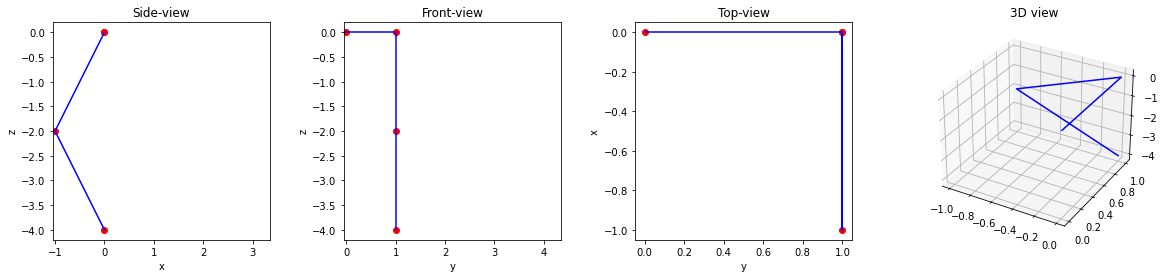

In [66]:
def plotLeg(JointPos): 
    """Plots the leg in 3D space, given the joint positions in coordinates."""

    # unpack the joint positions
    x, y, z = zip(*JointPos)
    
    # create a figure
    plt.figure(figsize=(20, 4))
    
    # plot x-z plane (side-view)
    plt.subplot(141)
    plt.plot(x, z, 'b-')
    plt.scatter(x, z, color='red')
    plt.title('Side-view')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.axis('square')

    # plot y-z plane (front-view)
    plt.subplot(142)
    plt.plot(y, z, 'b-')
    plt.scatter(y, z, color='red')
    plt.title('Front-view')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.axis('square')

    # plot x-y plane (top-view)
    plt.subplot(143)
    plt.plot(y, x, 'b-')
    plt.scatter(y, x, color='red')
    plt.title('Top-view')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.axis('square')

    # plot 3D view
    plt.subplot(144, projection='3d')
    plt.plot(x, y, z, 'b-')
    plt.scatter(x, y, z, c='r')
    plt.title('3D view')

    plt.show()


# Plot an example leg with arbitrary joint positions (for testing)
JointPos = [(0, 0, 0), (0, 1, 0), (-1, 1, -2), (0, 1, -4)]
plotLeg(JointPos)


## Determining the workspace

Calculating the workspace of the leg may be helpful for future calculations. This is the plot of all possible locations the foot can reach. To do so, joint angle limits will need to be determined (consider internal collisions and servo limits).  

## Calculating the inverse kinematics 

To calculate the inverse kinematics of the leg, basic trigonometry will be used. It will be easier to first perform this by hand and then implement it into this notebook. 

There also seems to be matrix methods available - if anyone finds more on this and find it applicable, we can discuss on using that instead to make the process faster. 

Some points to note before starting: 
- The angle of the joint connecting the hip and upper-leg will need to be determined first, as it provides the only out-of-plane movement.
- There will be two solutions (or more?) for each location, due to the fact that two of the links share the links share the same plane. 

## Making animation for gait sequence

First, we will start with making the foot follow a semicircle path. Make a plot animation to show that the inverse kinematics works for this. 

Other projects seem to use a separate file system called .gait or something similar - should we consider doing something like this? We can first test using an array for just one leg, then decide whether such system will be necessary for gait sequences. 